In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import dateparser
import datetime as dt
import sqlite3

### Data load and adjustment
#### data from IMF (na hovno)

In [12]:
# df = pd.read_csv('RUB_SDR_historical_data.csv', delimiter=';')
# names=['Time', 'RUB_SDR_avg', 'RUB_SDR_end', 'RUB_USD_avg', 'RUB_USD_end', 'NEER', 'REER']
# # df.columns=names

# lst = df.values.tolist()
# new_lst=[]
# for i,row in enumerate(lst):
#     bools = ['M' in j for j in row]
#     if any(bools):
#         new_lst.append(row)

# df=pd.DataFrame(new_lst)
# df.columns=names
# long_months = ['01','03','05','07','08','10','12']
# new_dates = []
# for date in df.Time.values:
#     new_date = date.replace('M','-')
#     year, month = new_date.split('-')
#     if month in long_months:
#         new_date = new_date + '-31'
#     elif month == '02':
#         new_date = new_date + '-28'
#     else:
#         new_date = new_date + '-30'
#     new_dates.append(dt.datetime.strptime(new_date, '%Y-%m-%d'))
    
# time = pd.DatetimeIndex(new_dates)
# df.drop('Time',1, inplace=True)

# names=['RUB_SDR_avg', 'RUB_SDR_end', 'RUB_USD_avg', 'RUB_USD_end', 'NEER', 'REER']
# df=pd.DataFrame(df.values.astype('float'))
# df.columns=names
# df['Time']=time
# df.set_index('Time', inplace=True)
# df = df[::-1]
# df.head()

### Russia

                     RUB_SDR_avg  RUB_SDR_end  RUB_USD_avg  RUB_USD_end  \
Time                                                                      
2018-07-31 00:00:00    88.198272    88.361643      62.7805      62.8815   
2018-06-30 00:00:00    88.271575    88.674305      62.7565      62.7115   
2018-05-31 00:00:00    88.673448    88.596649      62.5937      62.2062   
2018-04-30 00:00:00    89.159452    87.649221      61.9997      60.4268   
2018-03-31 00:00:00    83.255406    82.859123      57.2649      57.0331   

                          NEER       REER  
Time                                       
2018-07-31 00:00:00  65.274658  86.665956  
2018-06-30 00:00:00  64.955995  86.169427  
2018-05-31 00:00:00  64.723882  85.709282  
2018-04-30 00:00:00  64.806870  85.743441  
2018-03-31 00:00:00  68.268122  90.163904  


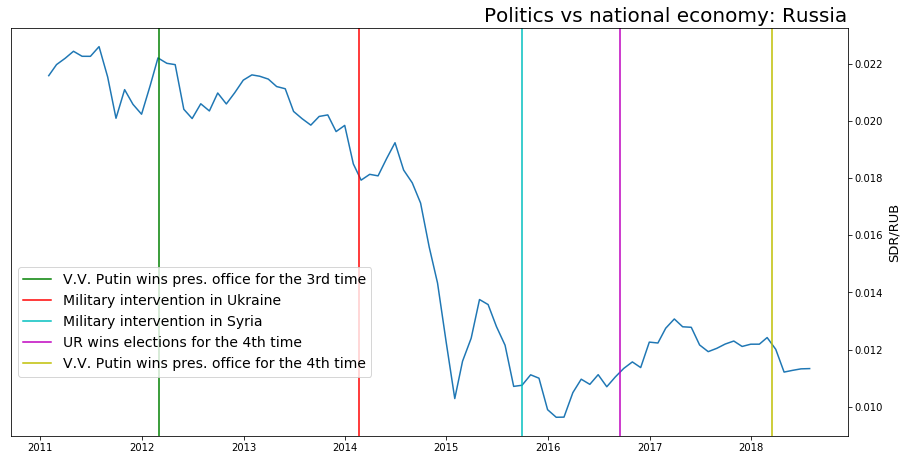

In [14]:
conn = sqlite3.connect('historical_exchange_rates.db')
df = pd.read_sql('select * from russian_ruble_SDR_USD', conn, parse_dates=True, index_col='Time')
conn.close()
df.index=pd.DatetimeIndex(df.index)
df['SDR_RUB_avg']=1/df['RUB_SDR_avg']
df=df['SDR_RUB_avg']
df=df[df.index>='2011-01-01']

fig = plt.figure(figsize=(15,7.5))
ax1 = plt.subplot(1,1,1)

ax1.plot(df.index, df, label = '')
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')
ax1.set_ylabel('SDR/RUB', fontdict = {'fontsize': 13})

timeline = {'2012-03-04':'V.V. Putin wins pres. office for the 3rd time',
            '2014-02-20':'Military intervention in Ukraine',
#             '2014-03-15':'US oil exports start rising',
            '2015-09-30':'Military intervention in Syria',
#             '2015-12-18':'USA lifts oil export ban',
            '2016-09-18':'UR wins elections for the 4th time',
            '2018-03-18':'V.V. Putin wins pres. office for the 4th time' 
           }
colors = ['g', 'r', 'c', 'm', 'y', 'b']

i = 0
for date, event in timeline.items():
    ax1.axvline(x = date, label = event, color = colors[i])
    i+=1

ax1.legend(prop={'size': 14}, loc = 2, bbox_to_anchor = (0.00,0.43), ncol = 1)
plt.title('Politics vs national economy: Russia', fontdict = {'fontsize': 20}, loc = 'right')
plt.show()

### Turkey

Time
2018-07-31    0.149719
2018-06-30    0.152848
2018-05-31    0.159472
2018-04-30    0.170075
2018-03-31    0.177215
Name: SDR_avg, dtype: float64


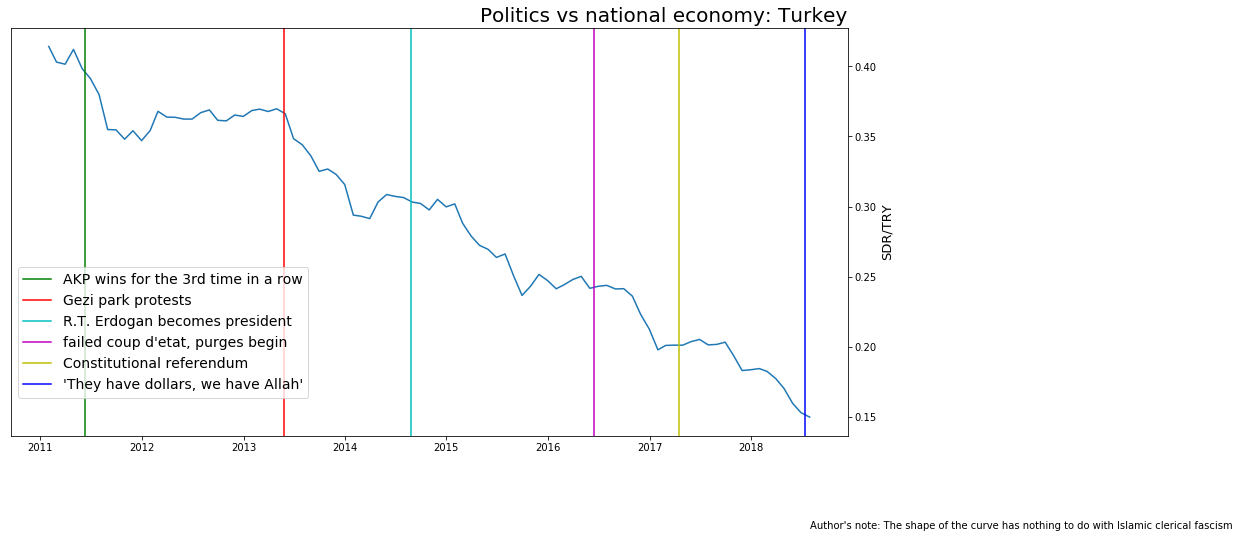

In [11]:
conn = sqlite3.connect('historical_exchange_rates.db')
df=pd.read_sql('select * from turkish_lira_SDR_USD_m',conn, parse_dates=True,index_col='Time')
df.index=pd.DatetimeIndex(df.index)

df=1/df['SDR_avg']
df=df[df.index>='2011-01-01']
print(df.head())

fig = plt.figure(figsize=(15,7.5))
ax1 = plt.subplot(1,1,1)
# ax2 = ax1.twinx()

ax1.plot(df.index, df, label = '')
# ax1.axes.get_yaxis().set_visible(False)
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')
ax1.set_ylabel('SDR/TRY', fontdict = {'fontsize': 13})

timeline = {#'2010-02-22': "'Sledgehammer' plot revealed"
             '2011-06-12': 'AKP wins for the 3rd time in a row'
            , '2013-05-27': 'Gezi park protests'
            , '2014-08-28': 'R.T. Erdogan becomes president'
            , '2016-06-15' : "failed coup d'etat, purges begin"
            , '2017-04-16': 'Constitutional referendum'
            , '2018-07-15': "'They have dollars, we have Allah'"
           }
colors = ['g', 'r', 'c', 'm', 'y', 'b']

i = 0
for date, event in timeline.items():
    ax1.axvline(x = date, label = event, color = colors[i])
    i+=1
    
ax1.text(df.index[0],0.07, "Author's note: The shape of the curve has nothing to do with Islamic clerical fascism")

ax1.legend(prop={'size': 14}, loc = 2, bbox_to_anchor = (0.00,0.43), ncol = 1)
plt.title('Politics vs national economy: Turkey', fontdict = {'fontsize': 20}, loc = 'right')
plt.show()